# 广州ADS-B数据提取机场位置


In [1]:
# 导入必要的库
import pandas as pd
import folium
from datetime import datetime, timedelta
import os

## 1. 读取并合并数据

In [2]:
# 配置参数
base_path = 'E:/data/广州20250728-20250803/广州20250728-20250803/'
start_date = '2025-07-28'
days = 7

# 生成文件路径列表
file_paths = []
start = datetime.strptime(start_date, '%Y-%m-%d')

for i in range(days):
    current_date = start + timedelta(days=i)
    date_str = current_date.strftime('%Y-%m-%d')
    file_path = os.path.join(base_path, f'{date_str}.csv')
    file_paths.append(file_path)

print("待读取的文件:")
for fp in file_paths:
    print(f"  {fp}")

待读取的文件:
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-07-28.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-07-29.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-07-30.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-07-31.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-08-01.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-08-02.csv
  E:/data/广州20250728-20250803/广州20250728-20250803/2025-08-03.csv


In [3]:
# 读取并合并数据
dataframes = []

for file_path in file_paths:
    try:
        if os.path.exists(file_path):
            df_temp = pd.read_csv(file_path, encoding='utf-8')
            dataframes.append(df_temp)
            print(f"✓ 成功读取: {os.path.basename(file_path)} - {len(df_temp)} 条记录")
        else:
            print(f"✗ 文件不存在: {file_path}")
    except UnicodeDecodeError:
        # 如果UTF-8失败，尝试GBK编码
        df_temp = pd.read_csv(file_path, encoding='gbk')
        dataframes.append(df_temp)
        print(f"✓ 成功读取 (GBK): {os.path.basename(file_path)} - {len(df_temp)} 条记录")
    except Exception as e:
        print(f"✗ 读取失败 {file_path}: {str(e)}")

# 合并所有数据
df = pd.concat(dataframes, ignore_index=True)
print(f"\n合并完成！总计 {len(df)} 条记录")

✓ 成功读取: 2025-07-28.csv - 3757185 条记录
✓ 成功读取: 2025-07-29.csv - 4431202 条记录
✓ 成功读取: 2025-07-30.csv - 4114144 条记录
✓ 成功读取: 2025-07-31.csv - 4352117 条记录
✓ 成功读取: 2025-08-01.csv - 4529258 条记录
✓ 成功读取: 2025-08-02.csv - 3815076 条记录
✓ 成功读取: 2025-08-03.csv - 4128070 条记录

合并完成！总计 29127052 条记录


In [4]:
# 查看数据基本信息
print("数据列:", list(df.columns))
print(f"\n数据形状: {df.shape}")
print(f"唯一航班数 (ICAO): {df['icao'].nunique()}")
df.head()

数据列: ['icao', 'rev_time', 'device_code', 'altitude', 'country', 'ver_speed_type', 'lng', 'lat', 'height', 'heading', 'ver_speed', 'type', 'speed_time', 'speed', 'position_time', 'callsign', 'a_code', 'company', 'emergency', 'spi', 'is_on_ground', 'alert', 'reg_no']

数据形状: (29127052, 23)
唯一航班数 (ICAO): 2997


,icao,rev_time,device_code,altitude,country,ver_speed_type,lng,lat,height,heading,...,speed,position_time,callsign,a_code,company,emergency,spi,is_on_ground,alert,reg_no
0,7865086,2025-07-28 00:00:00.037,30003F000A47363438383733,1021.08,中国,1,113.441179,22.713364,960.12,29.121200,...,128.96559,1753632000037,CSS372,1707.0,NaN,0,0,-1,0,B-2423
1,7868278,2025-07-28 00:00:00.037,30003F000A47363438383733,1409.70,中国,1,113.325450,22.576439,1417.32,49.777306,...,126.66725,1753632000037,CSZ9460,1546.0,NaN,0,0,-1,0,B-8411
2,7872425,2025-07-28 00:00:00.037,30003F000A47363438383733,1036.32,中国,0,113.252014,23.162704,982.98,14.633831,...,95.70464,1753632000037,CSN3636,3636.0,NaN,0,0,-1,0,NaN
3,7868174,2025-07-28 00:00:00.067,3A003A000C47363438383733,3246.12,中国,1,113.502655,22.813250,3360.42,133.939090,...,157.17435,1753632000067,CXA8805,1203.0,NaN,0,0,-1,0,B-7178
4,7869705,2025-07-28 00:00:00.067,3A003A000C47363438383733,2971.80,中国,1,112.705394,23.004913,3078.48,127.856180,...,137.47992,1753632000067,CES9824,1543.0,NaN,0,0,-1,0,NaN


In [5]:
# 查看数据详细信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29127052 entries, 0 to 29127051
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   icao            int64  
 1   rev_time        object 
 2   device_code     object 
 3   altitude        float64
 4   country         object 
 5   ver_speed_type  int64  
 6   lng             float64
 7   lat             float64
 8   height          float64
 9   heading         float64
 10  ver_speed       float64
 11  type            object 
 12  speed_time      int64  
 13  speed           float64
 14  position_time   int64  
 15  callsign        object 
 16  a_code          float64
 17  company         float64
 18  emergency       int64  
 19  spi             int64  
 20  is_on_ground    int64  
 21  alert           int64  
 22  reg_no          object 
dtypes: float64(9), int64(8), object(6)
memory usage: 5.0+ GB


## 2. 数据统计分析

In [6]:
# 基本统计
print("=== 数据统计 ===")
print(f"总记录数: {len(df)}")
print(f"唯一航班数 (ICAO): {df['icao'].nunique()}")

if 'altitude' in df.columns:
    print(f"\n高度统计:")
    print(f"  最大高度: {df['altitude'].max()}")
    print(f"  最小高度: {df['altitude'].min()}")
    print(f"  平均高度: {df['altitude'].mean():.2f}")

if 'speed' in df.columns:
    print(f"\n速度统计:")
    print(f"  最大速度: {df['speed'].max()}")
    print(f"  最小速度：{df['speed'].min()}")
    print(f"  平均速度: {df['speed'].mean():.2f}")

=== 数据统计 ===
总记录数: 29127052
唯一航班数 (ICAO): 2997

高度统计:
  最大高度: 12534.9
  最小高度: -2682.24
  平均高度: 2109.18

速度统计:
  最大速度: 459.51437
  最小速度：-1.0
  平均速度: 115.55


## 3. 可视化飞行轨迹

In [7]:
# 清理数据：删除无效的经纬度
df_clean = df.dropna(subset=['lat', 'lng'])
print(f"清理后数据: {len(df_clean)} 条记录")

# 计算地图中心（广州市中心）
map_center = [df_clean['lat'].mean(), df_clean['lng'].mean()]
print(f"地图中心: {map_center}")

清理后数据: 29127052 条记录
地图中心: [np.float64(23.312653730071176), np.float64(113.39933455910183)]


In [8]:
print("=== 异常高度数据检测 ===")
print()

# 检查高度统计
if 'altitude' in df_clean.columns:
    print(f"高度统计:")
    print(f"  最小值: {df_clean['altitude'].min():.2f}")
    print(f"  最大值: {df_clean['altitude'].max():.2f}")
    print(f"  平均值: {df_clean['altitude'].mean():.2f}")
    print(f"  中位数: {df_clean['altitude'].median():.2f}")
    
    # 找出异常高度的航班（负数高度）
    abnormal_altitude = df_clean[df_clean['altitude'] < 0]
    
    if len(abnormal_altitude) > 0:
        print(f"\n⚠️ 发现 {len(abnormal_altitude)} 条异常高度记录（高度 < 0）")
        print(f"涉及 {abnormal_altitude['icao'].nunique()} 个不同的ICAO")
        
        # 按ICAO分组统计异常记录
        agg_dict = {
            'altitude': ['count', 'min', 'max', 'mean'],
            'lat': 'first',
            'lng': 'first'
        }
        
        # 如果有callsign列，也包含进来
        if 'callsign' in abnormal_altitude.columns:
            agg_dict['callsign'] = 'first'
        
        abnormal_by_icao = abnormal_altitude.groupby('icao').agg(agg_dict).round(2)
        
        # 设置列名
        if 'callsign' in abnormal_altitude.columns:
            abnormal_by_icao.columns = ['异常记录数', '最小高度', '最大高度', '平均高度', '纬度', '经度', 'callsign']
        else:
            abnormal_by_icao.columns = ['异常记录数', '最小高度', '最大高度', '平均高度', '纬度', '经度']
        
        abnormal_by_icao = abnormal_by_icao.sort_values('异常记录数', ascending=False)
        
        print("\n前20个异常高度最多的航班:")
        display(abnormal_by_icao.head(20))
        
        # 检查这些航班的所有数据
        print("\n详细分析前5个异常航班:")
        for icao in abnormal_by_icao.head(5).index:
            flight_data = df_clean[df_clean['icao'] == icao]
            abnormal_data = flight_data[flight_data['altitude'] < 0]
            
            print(f"\n航班 {icao}:")
            print(f"  总记录数: {len(flight_data)}")
            print(f"  异常记录数: {len(abnormal_data)} ({len(abnormal_data)/len(flight_data)*100:.1f}%)")
            print(f"  高度范围: {flight_data['altitude'].min():.2f} ~ {flight_data['altitude'].max():.2f}")
            
            if 'time' in flight_data.columns or 'timestamp' in flight_data.columns:
                time_col = 'time' if 'time' in flight_data.columns else 'timestamp'
                print(f"  时间跨度: {flight_data[time_col].min()} ~ {flight_data[time_col].max()}")
    else:
        print("\n✓ 未发现负数高度记录")
    
    # 检查异常高的高度（可能的数据错误）
    high_altitude_threshold = 15000  # 一般民航不超过13000米
    very_high = df_clean[df_clean['altitude'] > high_altitude_threshold]
    
    if len(very_high) > 0:
        print(f"\n⚠️ 发现 {len(very_high)} 条异常高海拔记录（高度 > {high_altitude_threshold}）")
        print(f"涉及 {very_high['icao'].nunique()} 个不同的ICAO")

=== 异常高度数据检测 ===

高度统计:
  最小值: -2682.24
  最大值: 12534.90
  平均值: 2109.18
  中位数: 1882.14

⚠️ 发现 709 条异常高度记录（高度 < 0）
涉及 8 个不同的ICAO

前20个异常高度最多的航班:


,异常记录数,最小高度,最大高度,平均高度,纬度,经度,callsign
icao,,,,,,,
2236962,590,-2682.24,-396.24,-679.86,22.73,113.47,10A3
7866182,61,-243.84,-243.84,-243.84,23.40,113.29,CSN3313
7870519,44,-243.84,-243.84,-243.84,22.65,113.81,CSZ9231
7871498,5,-0.30,-0.30,-0.30,23.38,113.30,CQH8900
7865062,3,-243.84,-243.84,-243.84,23.41,113.30,CYZ9025
7864370,2,-243.84,-243.84,-243.84,23.42,113.30,CYZ9135
7869198,2,-243.84,-243.84,-243.84,23.46,113.29,CSN3519
7867650,2,-243.84,-243.84,-243.84,23.77,113.68,JYH1080



详细分析前5个异常航班:

航班 2236962:
  总记录数: 590
  异常记录数: 590 (100.0%)
  高度范围: -2682.24 ~ -396.24

航班 7866182:
  总记录数: 50219
  异常记录数: 61 (0.1%)
  高度范围: -243.84 ~ 5722.62

航班 7870519:
  总记录数: 14479
  异常记录数: 44 (0.3%)
  高度范围: -243.84 ~ 5722.62

航班 7871498:
  总记录数: 2164
  异常记录数: 5 (0.2%)
  高度范围: -0.30 ~ 5715.00

航班 7865062:
  总记录数: 26686
  异常记录数: 3 (0.0%)
  高度范围: -243.84 ~ 5745.48


In [9]:
print("=" * 60)
print("=== 轨迹分割处理 ===")
print()

# 设置时间间隔阈值（秒），超过这个阈值认为是新的轨迹
TIME_GAP_THRESHOLD = 3600  # 1小时，可以根据实际情况调整

# 确定时间列名
time_column = None
if 'position_time' in df_clean.columns:
    time_column = 'position_time'
elif 'timestamp' in df_clean.columns:
    time_column = 'timestamp'

if time_column is None:
    print("⚠️ 警告: 数据中没有找到时间列（'position_time' 或 'timestamp'），无法进行轨迹分割")
    print("将按原始ICAO进行分组")
    df_clean['trajectory_id'] = df_clean['icao']
else:
    print(f"使用时间列: {time_column}")
    print(f"时间间隔阈值: {TIME_GAP_THRESHOLD} 秒 ({TIME_GAP_THRESHOLD/3600:.1f} 小时)")
    
    # 将毫秒时间戳转换为datetime类型
    if df_clean[time_column].dtype in ['int64', 'float64']:
        try:
            # 毫秒时间戳转换为datetime
            df_clean[time_column] = pd.to_datetime(df_clean[time_column], unit='ms')
            print(f"✓ 已将毫秒时间戳转换为datetime格式")
        except Exception as e:
            print(f"✗ 时间戳转换失败: {e}")
    elif df_clean[time_column].dtype == 'object':
        try:
            df_clean[time_column] = pd.to_datetime(df_clean[time_column])
            print(f"✓ 已将时间列转换为datetime格式")
        except Exception as e:
            print(f"✗ 时间列转换失败: {e}")
    
    # 创建轨迹ID列
    df_clean = df_clean.sort_values(['icao', time_column]).reset_index(drop=True)
    
    # 计算每个ICAO内的时间差
    df_clean['time_diff'] = df_clean.groupby('icao')[time_column].diff()
    
    # 将时间差转换为秒
    if pd.api.types.is_timedelta64_dtype(df_clean['time_diff']):
        df_clean['time_diff_seconds'] = df_clean['time_diff'].dt.total_seconds()
    else:
        df_clean['time_diff_seconds'] = df_clean['time_diff']
    
    # 标记新轨迹的起点（时间间隔超过阈值或第一条记录）
    df_clean['is_new_trajectory'] = (
        (df_clean['time_diff_seconds'].isna()) |  # 第一条记录
        (df_clean['time_diff_seconds'] > TIME_GAP_THRESHOLD)  # 时间间隔过大
    )
    
    # 为每个轨迹分配唯一ID
    df_clean['trajectory_num'] = df_clean.groupby('icao')['is_new_trajectory'].cumsum()
    # 修复：先转换为字符串再拼接
    df_clean['trajectory_id'] = df_clean['icao'].astype(str) + '_T' + df_clean['trajectory_num'].astype(str)
    
    # 统计结果
    print(f"\n轨迹分割结果:")
    print(f"  原始ICAO数量: {df_clean['icao'].nunique()}")
    print(f"  分割后轨迹数量: {df_clean['trajectory_id'].nunique()}")
    print(f"  平均每个ICAO有 {df_clean['trajectory_id'].nunique() / df_clean['icao'].nunique():.2f} 条轨迹")
    
    # 统计每个ICAO的轨迹数量
    trajectories_per_icao = df_clean.groupby('icao')['trajectory_id'].nunique()
    
    print(f"\nICAO轨迹数量分布:")
    print(f"  只有1条轨迹: {(trajectories_per_icao == 1).sum()} 个ICAO")
    print(f"  有2条轨迹: {(trajectories_per_icao == 2).sum()} 个ICAO")
    print(f"  有3条或更多轨迹: {(trajectories_per_icao >= 3).sum()} 个ICAO")
    print(f"  最多轨迹数: {trajectories_per_icao.max()} 条")
    
    # 找出轨迹最多的ICAO
    top_icao = trajectories_per_icao.nlargest(10)
    print(f"\n轨迹数量最多的前10个ICAO:")
    for icao, count in top_icao.items():
        print(f"  {icao}: {count} 条轨迹")

=== 轨迹分割处理 ===

使用时间列: position_time
时间间隔阈值: 3600 秒 (1.0 小时)
✓ 已将毫秒时间戳转换为datetime格式

轨迹分割结果:
  原始ICAO数量: 2997
  分割后轨迹数量: 20062
  平均每个ICAO有 6.69 条轨迹

ICAO轨迹数量分布:
  只有1条轨迹: 380 个ICAO
  有2条轨迹: 804 个ICAO
  有3条或更多轨迹: 1813 个ICAO
  最多轨迹数: 32 条

轨迹数量最多的前10个ICAO:
  7866505: 32 条轨迹
  7872679: 31 条轨迹
  7872681: 31 条轨迹
  7872746: 31 条轨迹
  7864567: 30 条轨迹
  7865756: 30 条轨迹
  7865848: 30 条轨迹
  7867650: 30 条轨迹
  7870792: 30 条轨迹
  7872830: 30 条轨迹


In [10]:
# # 创建地图
# m = folium.Map(location=[23.13, 113.26], zoom_start=9, tiles='OpenStreetMap')

# # 确定分组字段：如果有trajectory_id则使用，否则使用icao
# if 'trajectory_id' in df_clean.columns:
#     group_field = 'trajectory_id'
#     print(f"使用轨迹ID分组")
# else:
#     group_field = 'icao'
#     print(f"使用ICAO分组")

# # 按分组字段分组并绘制轨迹
# grouped = df_clean.groupby(group_field)
# print(f"正在绘制 {len(grouped)} 条轨迹...")

# flight_count = 0
# for name, group in grouped:
#     # 如果数据中有时间列，按时间排序
#     if 'position_time' in group.columns:
#         group = group.sort_values('position_time')
#     elif 'time' in group.columns:
#         group = group.sort_values('time')
#     elif 'timestamp' in group.columns:
#         group = group.sort_values('timestamp')
    
#     # 创建经纬度坐标列表
#     lat_lon = list(zip(group['lat'], group['lng']))
    
#     # 绘制轨迹线
#     if len(lat_lon) > 1:  # 至少需要2个点
#         # 提取ICAO（去掉轨迹编号）
#         icao_code = str(name).split('_T')[0] if '_T' in str(name) else name
        
#         # 获取callsign（如果有）
#         callsign = group['callsign'].iloc[0] if 'callsign' in group.columns else 'N/A'
        
#         # 计算时间跨度（如果有时间列）
#         time_info = ""
#         if 'position_time' in group.columns:
#             time_start = group['position_time'].min()
#             time_end = group['position_time'].max()
#             duration = (time_end - time_start).total_seconds() / 60  # 转换为分钟
#             time_info = f"<br>起飞时间: {time_start}<br>降落时间: {time_end}<br>飞行时长: {duration:.1f}分钟"
        
#         # 高度信息（如果有）
#         altitude_info = ""
#         if 'altitude' in group.columns:
#             altitude_info = f"<br>高度范围: {group['altitude'].min():.0f} - {group['altitude'].max():.0f}m"
        
#         folium.PolyLine(
#             locations=lat_lon, 
#             color='blue', 
#             weight=0.25, 
#             opacity=0.5,
#             popup=f'轨迹ID: {name}<br>ICAO: {icao_code}<br>Callsign: {callsign}<br>数据点: {len(lat_lon)}{time_info}{altitude_info}'
#         ).add_to(m)
#         flight_count += 1
    
#     # 显示进度（每500条轨迹）
#     if flight_count % 500 == 0:
#         print(f"  已绘制 {flight_count} 条轨迹...")

# print(f"✓ 成功绘制 {flight_count} 条轨迹")

- 轨迹需根据时间进行分割处理，判断完整航迹段
- 部署本地地图

In [11]:
from sklearn.cluster import DBSCAN
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 导入机场检测器
from airport_detection import AirportDetector, main_pipeline

print(f"数据形状: {df_clean.shape}")
print(f"\n数据列: {list(df_clean.columns)}")
print(f"\n数据预览:")
df_clean.head()

数据形状: (29127052, 28)

数据列: ['icao', 'rev_time', 'device_code', 'altitude', 'country', 'ver_speed_type', 'lng', 'lat', 'height', 'heading', 'ver_speed', 'type', 'speed_time', 'speed', 'position_time', 'callsign', 'a_code', 'company', 'emergency', 'spi', 'is_on_ground', 'alert', 'reg_no', 'time_diff', 'time_diff_seconds', 'is_new_trajectory', 'trajectory_num', 'trajectory_id']

数据预览:


,icao,rev_time,device_code,altitude,country,ver_speed_type,lng,lat,height,heading,...,emergency,spi,is_on_ground,alert,reg_no,time_diff,time_diff_seconds,is_new_trajectory,trajectory_num,trajectory_id
0,552,2025-07-28 00:00:07.332,270025000847363438383733,0.0,NaN,0,113.271702,23.412998,0.0,-1.0,...,0,0,0,0,NaN,NaT,NaN,True,1,552_T1
1,552,2025-07-28 00:01:47.273,270025000847363438383733,0.0,NaN,0,113.271702,23.412998,0.0,-1.0,...,0,0,0,0,NaN,0 days 00:01:39.941000,99.941,False,1,552_T1
2,552,2025-07-28 00:03:22.313,270025000847363438383733,0.0,NaN,0,113.271701,23.413006,0.0,-1.0,...,0,0,0,0,NaN,0 days 00:01:35.040000,95.040,False,1,552_T1
3,552,2025-07-28 00:08:27.274,270025000847363438383733,0.0,NaN,0,113.271702,23.412998,0.0,-1.0,...,0,0,0,0,NaN,0 days 00:05:04.961000,304.961,False,1,552_T1
4,552,2025-07-28 00:11:22.335,270025000847363438383733,0.0,NaN,0,113.271701,23.413006,0.0,-1.0,...,0,0,0,0,NaN,0 days 00:02:55.061000,175.061,False,1,552_T1


In [ ]:
from airport_runway_detection import detect_airports, visualize_airports

# 运行识别（df_clean 就是你已有的轨迹分割后的数据）
clusters, landing_events = detect_airports(df_clean)

# 可视化（地图中心用广州）
m = visualize_airports(
    clusters, landing_events,
    map_center=[23.16, 113.26],
    output_path="airport_map.html"
)
m  # notebook 中直接显示

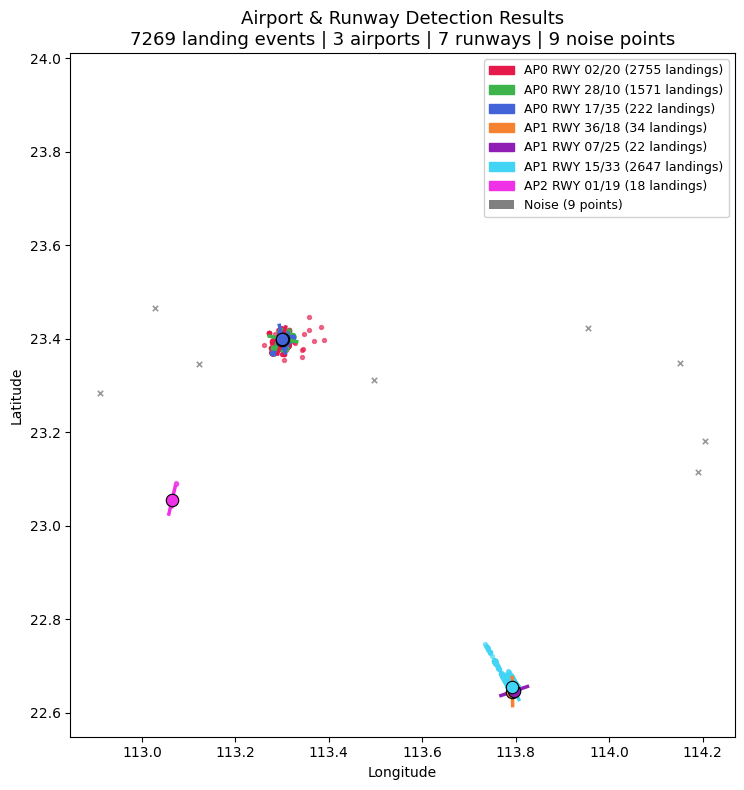

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

runway_colors = [
    '#e6194b', '#3cb44b', '#4363d8', '#f58231',
    '#911eb4', '#42d4f4', '#f032e6'
]

legend_handles = []
valid_events = landing_events[landing_events['cluster_id'] >= 0]

for i, (cid, grp) in enumerate(valid_events.groupby('cluster_id')):
    color = runway_colors[i % len(runway_colors)]

    rwy_info = clusters[clusters['cluster_id'] == cid]
    if len(rwy_info) == 0:
        continue
    rwy_name = rwy_info.iloc[0]['runway_name']
    ap_id    = rwy_info.iloc[0]['airport_id']
    count    = len(grp)

    ax.scatter(grp['lng'], grp['lat'],
               color=color, s=8, alpha=0.6, zorder=2)

    cx = rwy_info.iloc[0]['center_lng']
    cy = rwy_info.iloc[0]['center_lat']
    bearing = rwy_info.iloc[0]['main_bearing']

    angle_rad = np.radians(90 - bearing)
    half_len = 0.03
    dx = np.cos(angle_rad) * half_len
    dy = np.sin(angle_rad) * half_len
    ax.plot([cx - dx, cx + dx], [cy - dy, cy + dy],
            color=color, linewidth=2.5, zorder=3)

    ax.scatter(cx, cy, color=color, s=80,
               edgecolors='black', linewidths=0.8, zorder=4)

    legend_handles.append(
        mpatches.Patch(color=color,
                       label=f'AP{int(ap_id)} {rwy_name} ({count} landings)')
    )

# ── Noise points ──
noise = landing_events[landing_events['cluster_id'] == -1]
if len(noise) > 0:
    ax.scatter(noise['lng'], noise['lat'],
               color='grey', s=15, alpha=0.8,
               marker='x', linewidths=1.2, zorder=2)
    legend_handles.append(
        mpatches.Patch(facecolor='grey',
                       label=f'Noise ({len(noise)} points)')
    )

ax.set_title(
    f'Airport & Runway Detection Results\n'
    f'{len(valid_events)} landing events | '
    f'{clusters["airport_id"].nunique()} airports | '
    f'{len(clusters)} runways | '
    f'{len(noise)} noise points',
    fontsize=13
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(handles=legend_handles, loc='upper right',
          fontsize=9, framealpha=0.9)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


In [ ]:
runway_colors = [
    '#e6194b', '#3cb44b', '#4363d8', '#f58231',
    '#911eb4', '#42d4f4', '#f032e6'
]

map_center = [landing_events['lat'].mean(), landing_events['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=9, tiles='CartoDB positron')

valid_events = landing_events[landing_events['cluster_id'] >= 0]

# ── Landing events & runways ──
for i, (cid, grp) in enumerate(valid_events.groupby('cluster_id')):
    color = runway_colors[i % len(runway_colors)]

    rwy_info = clusters[clusters['cluster_id'] == cid]
    if len(rwy_info) == 0:
        continue
    rwy_name = rwy_info.iloc[0]['runway_name']
    ap_id    = int(rwy_info.iloc[0]['airport_id'])
    count    = len(grp)
    cx       = rwy_info.iloc[0]['center_lng']
    cy       = rwy_info.iloc[0]['center_lat']
    bearing  = rwy_info.iloc[0]['main_bearing']

    # Landing event points
    for _, ev in grp.iterrows():
        folium.CircleMarker(
            location=[ev['lat'], ev['lng']],
            radius=3,
            color=color, fill=True,
            fill_color=color, fill_opacity=0.6, weight=1,
            popup=folium.Popup(
                f"<b>Trajectory</b>: {ev['trajectory_id']}<br>"
                f"<b>ICAO</b>: {ev.get('icao', 'N/A')}<br>"
                f"<b>Bearing</b>: {ev['bearing']:.1f}°<br>"
                f"<b>Altitude</b>: {ev['altitude']:.0f} m<br>"
                f"<b>Airport</b>: AP{ap_id}<br>"
                f"<b>Runway</b>: {rwy_name}",
                max_width=220
            )
        ).add_to(m)

    # Runway direction line
    from airport_runway_detection import offset_point
    p1 = offset_point(cy, cx, bearing, 1.5)
    p2 = offset_point(cy, cx, (bearing + 180) % 360, 1.5)
    folium.PolyLine(
        locations=[p1, p2],
        color=color, weight=4, opacity=0.9,
        tooltip=f"AP{ap_id} {rwy_name} | {count} landings"
    ).add_to(m)

    # Runway center marker
    folium.CircleMarker(
        location=[cy, cx],
        radius=10,
        color=color, fill=True,
        fill_color=color, fill_opacity=0.9, weight=2,
        popup=folium.Popup(
            f"<b>Airport ID</b>: AP{ap_id}<br>"
            f"<b>Runway</b>: {rwy_name}<br>"
            f"<b>Landings</b>: {count}<br>"
            f"<b>Bearing</b>: {bearing:.1f}°<br>"
            f"<b>Center</b>: {cy:.5f}, {cx:.5f}",
            max_width=220
        ),
        tooltip=f"AP{ap_id} {rwy_name} | {count} landings"
    ).add_to(m)

# ── Noise points ──
noise = landing_events[landing_events['cluster_id'] == -1]
for _, ev in noise.iterrows():
    folium.CircleMarker(
        location=[ev['lat'], ev['lng']],
        radius=4,
        color='grey', fill=True,
        fill_color='grey', fill_opacity=0.7, weight=1,
        popup=folium.Popup(
            f"<b>Noise point</b><br>"
            f"<b>Trajectory</b>: {ev['trajectory_id']}<br>"
            f"<b>ICAO</b>: {ev.get('icao', 'N/A')}<br>"
            f"<b>Bearing</b>: {ev['bearing']:.1f}°<br>"
            f"<b>Altitude</b>: {ev['altitude']:.0f} m",
            max_width=200
        ),
        tooltip="Noise point"
    ).add_to(m)

# ── Legend ──
legend_items = ""
for i, (cid, grp) in enumerate(valid_events.groupby('cluster_id')):
    color = runway_colors[i % len(runway_colors)]
    rwy_info = clusters[clusters['cluster_id'] == cid]
    if len(rwy_info) == 0:
        continue
    rwy_name = rwy_info.iloc[0]['runway_name']
    ap_id    = int(rwy_info.iloc[0]['airport_id'])
    count    = len(grp)
    legend_items += (
        f'<span style="color:{color}">●</span> '
        f'AP{ap_id} {rwy_name} ({count} landings)<br>'
    )
legend_items += f'<span style="color:grey">●</span> Noise ({len(noise)} points)'

legend_html = f"""
<div style="
    position:fixed; bottom:30px; left:30px; z-index:1000;
    background:white; padding:12px 16px; border-radius:8px;
    border:1px solid #ccc; font-size:13px; line-height:1.9;
    box-shadow:2px 2px 6px rgba(0,0,0,0.2);">
    <b>Airport & Runway Detection</b><br>
    {len(valid_events)} events | {clusters['airport_id'].nunique()} airports |
    {len(clusters)} runways<br>
    <hr style="margin:6px 0">
    {legend_items}
    <hr style="margin:6px 0">
    <i>Line = runway approach direction</i>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

m.save("airport_runway_map.html")
m

In [ ]:
# 筛选该 ICAO 的所有轨迹
callsign_target = '10A3'
df_callsign = df_clean[df_clean['callsign'] == callsign_target].sort_values('position_time')

print(f"callsign {callsign_target} 共 {len(df_callsign)} 个点，{df_callsign['trajectory_id'].nunique()} 条轨迹")
print(df_callsign['trajectory_id'].unique())

# 建立地图
map_center = [df_callsign['lat'].mean(), df_callsign['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=10, tiles='CartoDB positron')

# 为每条轨迹分配不同颜色
colors = [
    '#e6194b','#3cb44b','#4363d8','#f58231','#911eb4',
    '#42d4f4','#f032e6','#bfef45','#fabed4','#469990',
    '#dcbeff','#9a6324','#fffac8','#800000','#aaffc3',
]

for i, (traj_id, traj) in enumerate(df_callsign.groupby('trajectory_id', sort=False)):
    traj = traj.sort_values('position_time')
    color = colors[i % len(colors)]
    coords = list(zip(traj['lat'], traj['lng']))
    
    if len(coords) < 2:
        continue
    
    # 轨迹线
    folium.PolyLine(
        locations=coords,
        color=color,
        weight=2.5,
        opacity=0.85,
        tooltip=f"{traj_id}  ({len(traj)} 个点)"
    ).add_to(m)
    
    # 起点（圆形）
    folium.CircleMarker(
        location=coords[0],
        radius=6, color=color, fill=True, fill_opacity=1,
        popup=f"起点 | {traj_id}<br>{traj['position_time'].iloc[0]}"
    ).add_to(m)
    
    # 终点（方块用 DivIcon 模拟）
    folium.Marker(
        location=coords[-1],
        icon=folium.DivIcon(
            html=f'<div style="width:10px;height:10px;background:{color};'
                 f'border:1px solid #333;margin-top:-5px;margin-left:-5px;"></div>'
        ),
        popup=f"终点 | {traj_id}<br>{traj['position_time'].iloc[-1]}"
    ).add_to(m)

m

<Figure size 1000x800 with 0 Axes>

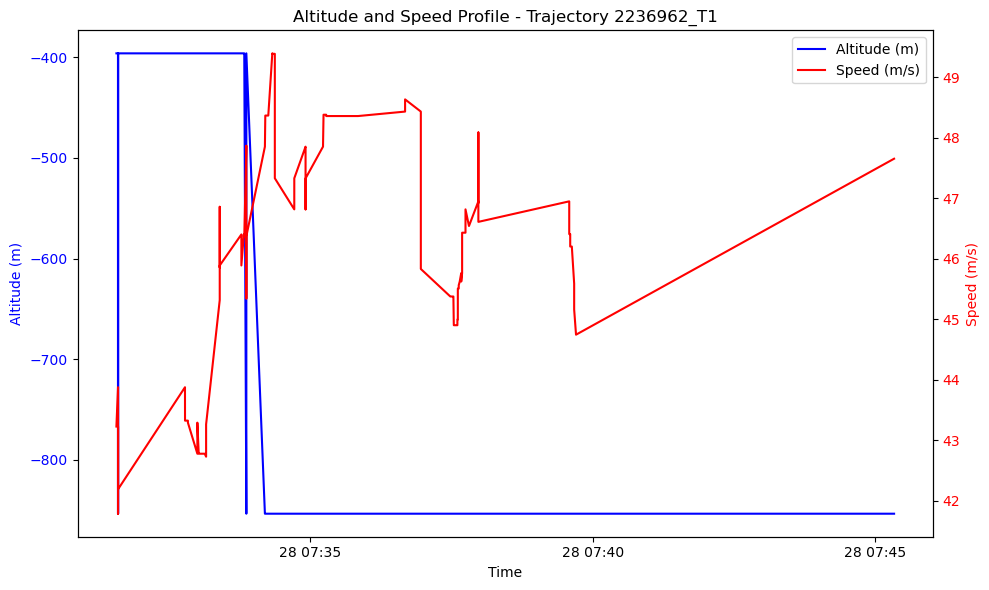

In [39]:
df_callsign = df_clean[df_clean['callsign'] == callsign_target].sort_values('position_time')

traj_target = df_callsign['trajectory_id'].unique()[0]
fig = plt.figure(figsize=(10, 8))
df_single = df_callsign[
    df_callsign['trajectory_id'] == traj_target
].copy()
# 按 trajectory_id 分组绘图
# for traj_id, group in df_callsign.groupby('trajectory_id'):
#     plt.plot(group['position_time'], 
#              group['altitude'], 
#              label=f'Traj {traj_id}')

fig, ax1 = plt.subplots(figsize=(10, 6))

line1 = ax1.plot(
    df_single['position_time'],
    df_single['altitude'],
    color='blue',
    label='Altitude (m)'
)
ax1.set_xlabel('Time')
ax1.set_ylabel('Altitude (m)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.plot(
    df_single['position_time'],
    df_single['speed'],
    color='red',
    label='Speed (m/s)'
)
ax2.set_ylabel('Speed (m/s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

plt.title(f'Altitude and Speed Profile - Trajectory {traj_target}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

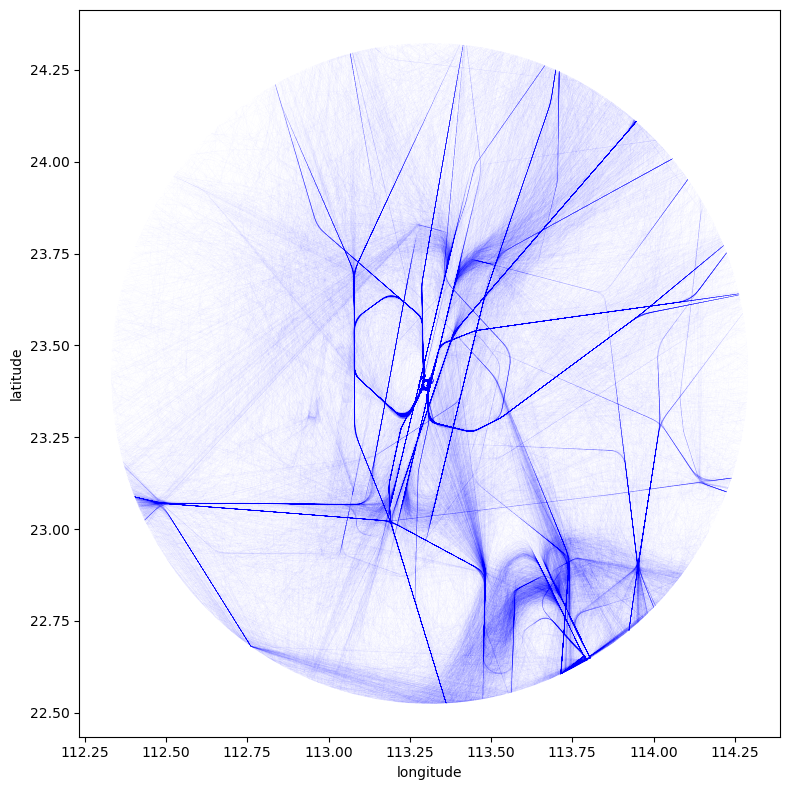

In [15]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 8))

for traj_id, traj in df_clean.groupby('trajectory_id', sort=False):
    traj = traj.sort_values('position_time')
    ax.plot(traj['lng'], traj['lat'], 
            color='blue', alpha=0.01, linewidth=0.4)


ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.tight_layout()
plt.show()

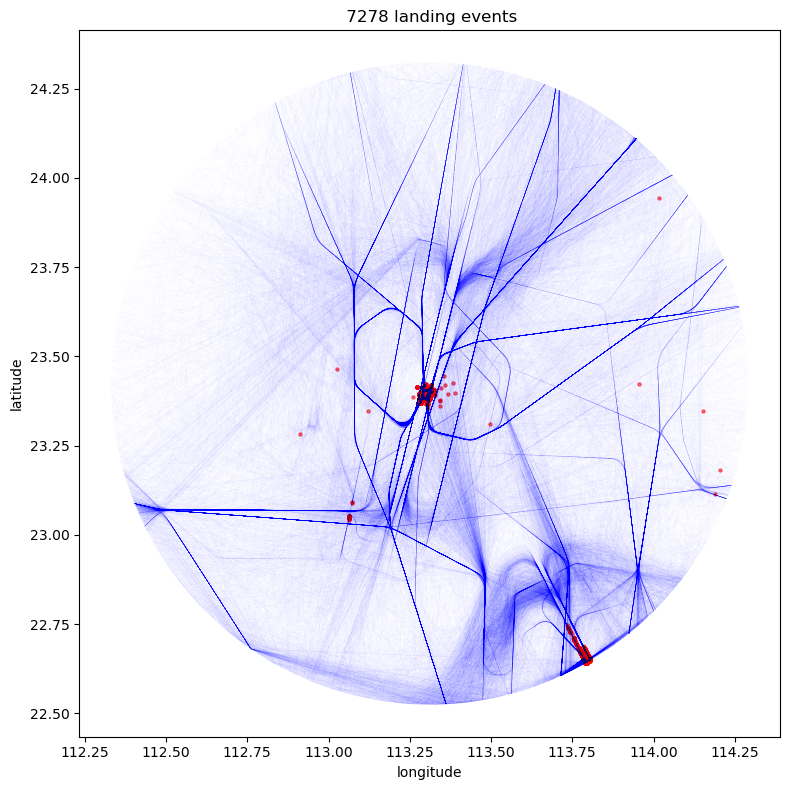

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(landing_events['lng'], landing_events['lat'],
           color='red', alpha=0.5, s=5)
for traj_id, traj in df_clean.groupby('trajectory_id', sort=False):
    traj = traj.sort_values('position_time')
    ax.plot(traj['lng'], traj['lat'], 
            color='blue', alpha=0.01, linewidth=0.4)
ax.set_title(f" {len(landing_events)} landing events")
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.tight_layout()
plt.show()

In [17]:
# 取第一个着陆事件对应的轨迹
sample_traj_id = landing_events.iloc[0]['trajectory_id']
sample_traj = df_clean[df_clean['trajectory_id'] == sample_traj_id].sort_values('position_time')

# 看最后20个点的高度、速度、坐标
print(sample_traj[['position_time', 'lat', 'lng', 'altitude', 'speed', 'heading','height']].tail(20))

             position_time        lat         lng  altitude     speed  \
0  2025-07-27 16:00:07.332  23.412998  113.271702       0.0 -0.514444   
1  2025-07-27 16:01:47.273  23.412998  113.271702       0.0 -0.514444   
2  2025-07-27 16:03:22.313  23.413006  113.271701       0.0 -0.514444   
3  2025-07-27 16:08:27.274  23.412998  113.271702       0.0 -0.514444   
4  2025-07-27 16:11:22.335  23.413006  113.271701       0.0 -0.514444   
5  2025-07-27 16:15:27.297  23.412998  113.271702       0.0 -0.514444   
6  2025-07-27 16:16:57.331  23.412998  113.271702       0.0 -0.514444   
7  2025-07-27 16:31:27.342  23.412998  113.271702       0.0 -0.514444   
8  2025-07-27 16:40:52.344  23.413006  113.271701       0.0 -0.514444   
9  2025-07-27 16:43:12.343  23.413006  113.271701       0.0 -0.514444   
10 2025-07-27 16:54:27.295  23.412998  113.271702       0.0 -0.514444   
11 2025-07-27 17:00:42.294  23.413006  113.271701       0.0 -0.514444   
12 2025-07-27 17:03:22.360  23.413006  113.271701  

In [ ]:
m = folium.Map(location=[landing_events['lat'].mean(), landing_events['lng'].mean()], zoom_start=9)
for _, row in landing_events.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=4, color='blue', fill=True, fill_opacity=0.5,
        popup=f"bearing: {row['bearing']:.1f}°"
    ).add_to(m)
m

In [19]:
# 先重新导入（确保用的是最新版本的 .py 文件）
import importlib
import airport_runway_detection
importlib.reload(airport_runway_detection)
from airport_runway_detection import extract_landing_events

# 然后逐步对比
ev1 = extract_landing_events(df_clean, min_traj_points=10, min_traj_minutes=5.0)
print(f"时长过滤后: {len(ev1)} 个事件")

ev2 = extract_landing_events(df_clean, min_traj_points=10, min_traj_minutes=5.0,
                              final_alt_threshold_m=200.0)
print(f"高度过滤后: {len(ev2)} 个事件")

ev3 = extract_landing_events(df_clean, min_traj_points=10, min_traj_minutes=5.0,
                              final_alt_threshold_m=200.0, min_speed_drop_ratio=0.4)
print(f"速度过滤后: {len(ev3)} 个事件")

时长过滤后: 7278 个事件
高度过滤后: 7278 个事件
速度过滤后: 7278 个事件


In [ ]:
import importlib, wind_extraction
importlib.reload(wind_extraction)
from wind_extraction import extract_wind_single, extract_wind_grid, \
                            visualize_wind_grid, plot_wind_view, plot_quality_diagnostics

# Step 1：全区域单一估计，验证算法是否正常工作
result = extract_wind_single(df_clean)

# Step 2：查看 wind view 散点图（复现论文 Fig.1）
plot_wind_view(df_clean)

# Step 3：4×4 网格提取
grid_results = extract_wind_grid(df_clean, n_lat=4, n_lng=4)

# Step 4：可视化风场箭头图
visualize_wind_grid(grid_results, df_clean)

# Step 5：质量诊断
plot_quality_diagnostics(grid_results)

In [20]:
# # 创建检测器
# detector = AirportDetector(
#     altitude_threshold=600,      # 高度阈值（米）
#     speed_min=-1,                # 最小地速（m/s，约72 km/h）
#     speed_max=100,               # 最大地速（m/s，约360 km/h）
#     ver_speed_threshold=1,       # 垂直速度阈值（m/s）
#     eps_km=1.5,                  # DBSCAN邻域半径（公里）
#     min_samples=15               # DBSCAN最小样本数
# )

# print("✓ 检测器初始化完成")
# print(f"  高度阈值: {detector.altitude_threshold}m")
# print(f"  速度范围: {detector.speed_min}-{detector.speed_max} m/s")
# print(f"  DBSCAN半径: {detector.eps_km} km")

In [21]:
# # 分块过滤提取事件
# events = detector.extract_events_chunked(df_clean, chunk_size=100000)

# print(f"\n提取的事件数: {len(events):,}")
# print(f"数据压缩率: {(1 - len(events)/len(df_clean))*100:.2f}%")

In [22]:
# # 查看事件分布
# events.head()

In [23]:
# clustered_data = detector.cluster_airports_scalable(precision=0.001, min_weight=20)

In [24]:
# # 提取机场信息
# airports = detector.extract_airport_locations(min_events=100)

# print(f"\n识别的机场数: {len(airports)}")
# airports

In [25]:
# # 分析时空模式
# patterns = detector.analyze_temporal_patterns()

# if patterns is not None:
#     print("\n时空模式:")
#     display(patterns)

In [26]:
# # 直接调用可视化方法
# m = detector.visualize_airports(save_path='detected_airports.html')

# # 在Jupyter中显示
# display(m)

# # 或者直接打开HTML文件查看

In [27]:
# # 选择事件最多的机场
# top_airport_id = airports.iloc[0]['cluster_id']
# top_airport_events = detector.takeoff_landing_events[
#     detector.takeoff_landing_events['cluster'] == top_airport_id
# ]

# print(f"机场 #{top_airport_id} 详细分析:")
# print(f"位置: ({airports.iloc[0]['latitude']:.4f}, {airports.iloc[0]['longitude']:.4f})")
# print(f"事件总数: {len(top_airport_events):,}")
# print(f"涉及航班: {top_airport_events['icao'].nunique()}")

# # 创建该机场的详细地图
# m_single = folium.Map(
#     location=[airports.iloc[0]['latitude'], airports.iloc[0]['longitude']],
#     zoom_start=12
# )

# # 采样绘制事件点
# sample_size = min(2000, len(top_airport_events))
# for _, event in top_airport_events.sample(sample_size).iterrows():
#     folium.CircleMarker(
#         location=[event['lat'], event['lng']],
#         radius=2,
#         color='blue',
#         fill=True,
#         fillOpacity=0.4
#     ).add_to(m_single)

# # 标记质心
# folium.Marker(
#     location=[airports.iloc[0]['latitude'], airports.iloc[0]['longitude']],
#     popup='机场质心',
#     icon=folium.Icon(color='red', icon='plane', prefix='fa')
# ).add_to(m_single)

# m_single.save(f'airport_{top_airport_id}_detail.html')
# display(m_single)

In [28]:
# from runway_detector import runway_detection_pipeline

# detector = runway_detection_pipeline(df)

# # 查看跑道
# print(detector.landing_runways)  # 降落跑道
# print(detector.takeoff_runways)  # 起飞跑道